In [58]:
#################################################################################
# Author: Paulina Arregocés Guerra
# Research groups 
# GITA (Applied Telecommunications Research Group)  - Universidad de Antioquia 
# GIDIA (Artificial Intelligence Research Group) - Universidad Nacional de Colombia
#
# Last modified on 13/06/2023 
# Desciotion: This code is used to label the dataset and to train and test the decision # tree and support vector machine models with real data. 
#################################################################################

In [ ]:
# Select your preferences and run the install command...https://pytorch.org/
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

# Uncomment for requirement libraries versions
#!pip install -r requirements.txt 

In [11]:
import pandas as pd
import torch
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
import numpy as np 
import torch.optim as optim
import torch.nn as nn  # The torch.nn import gives us access to some helpful neural network things
import torch.nn.functional as F # 
import matplotlib.pyplot as plt
import ipaddress

In [4]:
df_copy=pd.read_csv('.\CSV_TXT\CICDS2017_clean.csv')

In [5]:
df_copy.columns

Index(['Unnamed: 0', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Lengt

#  Division into datasets for training

In [6]:
df_X= df_copy[{' Destination Port',' Total Fwd Packets',' Total Backward Packets'}] 
df_Y=df_copy['Label']

C:\Users\Informatica\AppData\Local\Temp\ipykernel_11524\2077438084.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_X= df_copy[{' Destination Port',' Total Fwd Packets',' Total Backward Packets'}]


In [7]:
df_X.head(10)

,Total Fwd Packets,Destination Port,Total Backward Packets
0,9.0,8080.0,9.0
1,1.0,8080.0,1.0
2,4.0,8080.0,3.0
3,1.0,1841.0,1.0
4,4.0,8080.0,3.0
5,1.0,1845.0,1.0
6,5.0,8080.0,4.0
7,4.0,8080.0,3.0
8,1.0,1846.0,1.0
9,1.0,1847.0,1.0


In [8]:
df_X.describe()

,Total Fwd Packets,Destination Port,Total Backward Packets
count,3.670266e+06,3.670266e+06,3.670266e+06
mean,1.013496e+02,6.579399e+03,8.308997e+01
std,8.327601e+02,1.667816e+04,9.706190e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.300000e+01,1.000000e+00
50%,2.000000e+00,8.000000e+01,2.000000e+00
75%,7.000000e+00,4.430000e+02,5.000000e+00
max,2.197590e+05,6.553500e+04,2.919220e+05


In [9]:
df_Y

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
3670261    0.0
3670262    0.0
3670263    0.0
3670264    0.0
3670265    0.0
Name: Label, Length: 3670266, dtype: float64

In [10]:
df_Xbin=df_X.copy()
df_Ybin=df_Y

In [12]:
fix_ip=32
fix_port=16
fix_proto=8
fix_len=32
complete= 0

def ip_binary(x):
    binary_num=bin(int(ipaddress.IPv4Address(x)))
    len_binary=len(binary_num)
    if len_binary== 34:
        return binary_num[2:] 
    else:
        complete=fix_ip-(len_binary-2)
        cero='0'
        cero_complete=cero*complete 
        new_binary = binary_num.replace("0b", cero_complete)
        return new_binary

def port_binary(x):
    binary_num=bin(int(x))
    len_binary=len(binary_num)
    if len_binary== 18:
        return binary_num[2:] 
    else:
        complete=fix_port-(len_binary-2)
        cero='0'
        cero_complete=cero*complete 
        new_binary = binary_num.replace("0b", cero_complete)
        return new_binary

def proto_binary(x):
    binary_num=bin(int(x))
    len_binary=len(binary_num)
    if len_binary== 10:
        return binary_num[2:] 
    else:
        complete=fix_proto-(len_binary-2)
        cero='0'
        cero_complete=cero*complete 
        new_binary = binary_num.replace("0b", cero_complete)
        return new_binary
    
def totpackets_binary(x):
    binary_num=bin(int((x)))
    #fix_packets=16
    len_binary=len(binary_num)
    #print(len_binary)
    if len_binary== 34:
        return binary_num[2:] 
    else:
        complete=fix_len-(len_binary-2)
        cero='0'
        cero_complete=cero*complete 
        new_binary = binary_num.replace("0b", cero_complete)
        return new_binary

In [13]:
df_Xbin.loc[:,' Destination Port'] = df_Xbin.loc[:,' Destination Port'].apply(lambda x:port_binary(x))
df_Xbin.loc[:,' Total Fwd Packets'] = df_Xbin.loc[:,' Total Fwd Packets'].apply(lambda x:totpackets_binary(x))
df_Xbin.loc[:,' Total Backward Packets'] = df_Xbin.loc[:,' Total Backward Packets'].apply(lambda x:totpackets_binary(x))

In [14]:
df_Xbin

,Total Fwd Packets,Destination Port,Total Backward Packets
0,00000000000000000000000000001001,0001111110010000,00000000000000000000000000001001
1,00000000000000000000000000000001,0001111110010000,00000000000000000000000000000001
2,00000000000000000000000000000100,0001111110010000,00000000000000000000000000000011
3,00000000000000000000000000000001,0000011100110001,00000000000000000000000000000001
4,00000000000000000000000000000100,0001111110010000,00000000000000000000000000000011
...,...,...,...
3670261,00000000000000000000000000000100,0000000000110101,00000000000000000000000000000010
3670262,00000000000000000000000000000010,0000000000110101,00000000000000000000000000000010
3670263,00000000000000000000000000000010,1110001010101110,00000000000000000000000000000001
3670264,00000000000000000000000000000110,0000000000110101,00000000000000000000000000000010


In [15]:
df_XbinNN=df_Xbin.copy()
df_YbinNN=df_Ybin.copy()

In [16]:
def Conv_bin1(string):
    vector=[]
    for i in string:
        vector.append(i)
        
    for k in range(len(vector)):
        if vector[k]=='1':vector[k]=float('1')
        elif vector[k]=='0':vector[k]=float('0')
            
    return vector

In [17]:
df_XbinNN.loc[:,' Destination Port'] = df_XbinNN[' Destination Port'].apply(lambda x:Conv_bin1(x))
df_XbinNN.loc[:,' Total Fwd Packets'] = df_XbinNN[' Total Fwd Packets'].apply(lambda x:Conv_bin1(x))
df_XbinNN.loc[:,' Total Backward Packets'] = df_XbinNN[' Total Backward Packets'].apply(lambda x:Conv_bin1(x))

In [18]:
df_XbinNN

,Total Fwd Packets,Destination Port,Total Backward Packets
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
3670261,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3670262,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3670263,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3670264,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
df_XbinNN['final_vec'] = df_XbinNN[' Total Fwd Packets']+df_XbinNN[' Destination Port']+df_XbinNN[' Total Backward Packets']

In [20]:
df_XbinNN['final_vec'].head()

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: final_vec, dtype: object

In [21]:
df_YbinNN

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
3670261    0.0
3670262    0.0
3670263    0.0
3670264    0.0
3670265    0.0
Name: Label, Length: 3670266, dtype: float64

Text(0, 0.5, 'Number of Observations')

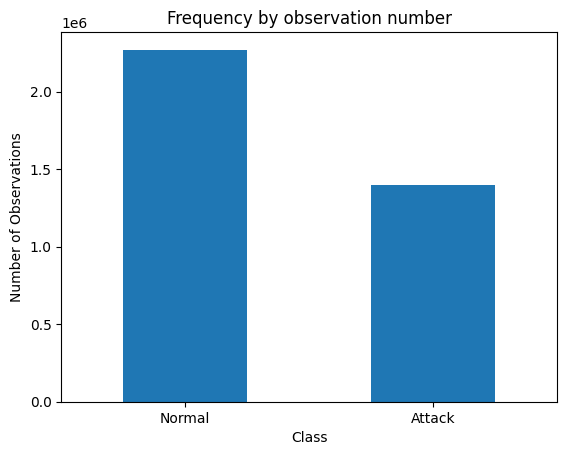

In [22]:
count_classes = pd.value_counts(df_YbinNN, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), {'Attack','Normal'})
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [78]:
# Uncomment to Save data
#df_XbinNN['final_vec'].to_csv('Datos_Trans01.csv', sep=',')
#df_YbinNN.to_csv('labels01.csv')
# Uncomment to save data
#Xbin_NN=pd.read_csv('.\CSV_TXT\Datos_Trans01.csv')

In [23]:
# Conjunto mejor random_state=3
from sklearn.model_selection import train_test_split

x_trainNN, x_valNN, y_trainNN, y_valNN = train_test_split(df_XbinNN['final_vec'], df_YbinNN, train_size=0.7,random_state = 42)
x_valNN, x_testNN, y_valNN, y_testNN = train_test_split(x_valNN, y_valNN, test_size=0.5, random_state = 42)

In [24]:
target_trainNN= torch.from_numpy(np.array(y_trainNN))
target_valNN= torch.from_numpy(np.array(y_valNN))
target_testNN= torch.from_numpy(np.array(y_testNN))

features_trainNN=torch.Tensor(list(x_trainNN))
features_valNN=torch.Tensor(list(x_valNN))
features_testNN= torch.Tensor(list(x_testNN)) 

In [25]:
features_valNN

tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [26]:
# Uncomment to save txt data
target_train= np.array(target_trainNN)
target_val= np.array(target_valNN)
target_test = np.array(target_testNN)
features_train = np.array(features_trainNN)
features_val = np.array(features_valNN)
features_test = np.array(features_testNN)
'''
np.savetxt('target_train.txt', target_train, fmt='%d')
np.savetxt('target_val.txt', target_val, fmt='%d')
np.savetxt('target_test.txt', target_test, fmt='%d')
np.savetxt('features_train.txt', features_train, fmt='%d')
np.savetxt('features_val.txt', features_val, fmt='%d')
np.savetxt('features_test.txt', features_test, fmt='%d')'''

"\nnp.savetxt('target_train.txt', target_train, fmt='%d')\nnp.savetxt('target_val.txt', target_val, fmt='%d')\nnp.savetxt('target_test.txt', target_test, fmt='%d')\nnp.savetxt('features_train.txt', features_train, fmt='%d')\nnp.savetxt('features_val.txt', features_val, fmt='%d')\nnp.savetxt('features_test.txt', features_test, fmt='%d')"

In [85]:
# Uncomment to load data 
'''a0 =torch.from_numpy(np.loadtxt('target_train.txt', dtype=int)) 
a1 =torch.from_numpy(np.loadtxt('target_val.txt', dtype=int)) 
a2 =torch.from_numpy(np.loadtxt('target_test.txt', dtype=int)) 
a3 =torch.torch.Tensor(np.loadtxt('features_train.txt', dtype=int))
a4 =torch.torch.Tensor(np.loadtxt('features_val.txt', dtype=int))
a5 =torch.torch.Tensor(np.loadtxt('features_test.txt', dtype=int)) '''

"a0 =torch.from_numpy(np.loadtxt('target_train.txt', dtype=int)) \na1 =torch.from_numpy(np.loadtxt('target_val.txt', dtype=int)) \na2 =torch.from_numpy(np.loadtxt('target_test.txt', dtype=int)) \na3 =torch.torch.Tensor(np.loadtxt('features_train.txt', dtype=int))\na4 =torch.torch.Tensor(np.loadtxt('features_val.txt', dtype=int))\na5 =torch.torch.Tensor(np.loadtxt('features_test.txt', dtype=int)) "

In [27]:
features_trainNN[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0.])

In [28]:
trainNN = torch.utils.data.TensorDataset(features_trainNN, target_trainNN)
testNN = torch.utils.data.TensorDataset(features_testNN, target_testNN)

trainsetNN = torch.utils.data.DataLoader(trainNN, batch_size=10, shuffle=True)
testsetNN = torch.utils.data.DataLoader(testNN, batch_size=10, shuffle=False)

In [29]:
for dataNN in trainsetNN:
    print(dataNN)
    break

[tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
         0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.,

In [30]:
XNN, yNN = dataNN

In [31]:
print(yNN.size())

torch.Size([10])


In [32]:
# Check balance data

total = 0
counter_dict = {0:0, 1:0}


for data in trainsetNN:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 1589986, 1: 979200}
0: 61.886761020805814%
1: 38.113238979194186%


## Binary Data

In [33]:
# Convert values 
def Conv_bin(string):
    vector=[]
    for i in string:
        vector.append(i)
        
    for k in range(len(vector)):
        if vector[k]=='1':vector[k]=int('-1')
        elif vector[k]=='0':vector[k]=int('+1')
            
    return vector

def Conv_ybin(label):
    if label == 0: 
        label= +1
    elif label ==1:
        label=-1
    return label

In [34]:
df_Xneg=df_Xbin.copy()
df_Yneg=df_Ybin.copy()

In [35]:
df_Xneg.loc[:,' Destination Port'] = df_Xneg[' Destination Port'].apply(lambda x:Conv_bin(x))
df_Xneg.loc[:,' Total Backward Packets'] = df_Xneg[' Total Backward Packets'].apply(lambda x:Conv_bin(x))
df_Xneg.loc[:,' Total Fwd Packets'] = df_Xneg[' Total Fwd Packets'].apply(lambda x:Conv_bin(x))

In [36]:
df_Yneg=df_Yneg.apply(lambda y:Conv_ybin(y))

In [37]:
df_Xneg.head()

,Total Fwd Packets,Destination Port,Total Backward Packets
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [38]:
df_Xneg['final_vec'] = df_Xneg[' Total Fwd Packets']+df_Xneg[' Destination Port']+df_Xneg[' Total Backward Packets']

In [39]:
df_Xneg['final_vec'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
2    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: final_vec, dtype: object

In [40]:
#Uncomment to save csv binary data 
#df_Xneg['final_vec'].to_csv('Datos_Trans1-1.csv', sep=',')
#df_Yneg.to_csv('labels1-1.csv')

In [41]:
# Train, test data

x_train, x_val, y_train, y_val = train_test_split(df_Xneg['final_vec'], df_Yneg,random_state = 3, train_size=0.7)# entrenamiento, validación
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)# validacion y test

In [42]:
target_train= torch.from_numpy(np.array(y_train))
target_val= torch.from_numpy(np.array(y_val))
target_test= torch.from_numpy(np.array(y_test))

features_train=torch.Tensor(list(x_train))
features_val=torch.Tensor(list(x_val))
features_test= torch.Tensor(list(x_test))

In [43]:
# Uncomment to save txt data
target_train_Bin= np.array(target_train)
target_val_Bin= np.array(target_val)
target_test_Bin = np.array(target_test)
features_train_Bin = np.array(features_train)
features_val_Bin = np.array(features_val)
features_test_Bin = np.array(features_test)
'''
np.savetxt('target_train_Bin.txt', target_train_Bin, fmt='%d')
np.savetxt('target_val_Bin.txt', target_val_Bin, fmt='%d')
np.savetxt('target_test_Bin.txt', target_test_Bin, fmt='%d')
np.savetxt('features_train_Bin.txt', features_train_Bin, fmt='%d')
np.savetxt('features_val_Bin.txt', features_val_Bin, fmt='%d')
np.savetxt('features_test_Bin.txt', features_test_Bin, fmt='%d')'''


"\nnp.savetxt('target_train_Bin.txt', target_train_Bin, fmt='%d')\nnp.savetxt('target_val_Bin.txt', target_val_Bin, fmt='%d')\nnp.savetxt('target_test_Bin.txt', target_test_Bin, fmt='%d')\nnp.savetxt('features_train_Bin.txt', features_train_Bin, fmt='%d')\nnp.savetxt('features_val_Bin.txt', features_val_Bin, fmt='%d')\nnp.savetxt('features_test_Bin.txt', features_test_Bin, fmt='%d')"

In [44]:
# Uncomment to load tensors arrays
'''a0 =torch.from_numpy(np.loadtxt('target_train_Bin.txt', dtype=int)) 
a1 =torch.from_numpy(np.loadtxt('target_test_Bin.txt', dtype=int)) 
a2 =torch.torch.Tensor(np.loadtxt('features_train_Bin.txt', dtype=int))
a3 =torch.torch.Tensor(np.loadtxt('features_test_Bin.txt', dtype=int)) '''

"a0 =torch.from_numpy(np.loadtxt('target_train_Bin.txt', dtype=int)) \na1 =torch.from_numpy(np.loadtxt('target_test_Bin.txt', dtype=int)) \na2 =torch.torch.Tensor(np.loadtxt('features_train_Bin.txt', dtype=int))\na3 =torch.torch.Tensor(np.loadtxt('features_test_Bin.txt', dtype=int)) "